# https://www.kaggle.com/bhavyamalikk/heart-disease-5-ml-models-with-cv

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
df = pd.read_csv('/home/kerem/Datasets/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.drop('education', axis=1, inplace=True)

In [5]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4209 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


In [7]:
df.dropna(axis=0, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3749 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3749 non-null   int64  
 1   age              3749 non-null   int64  
 2   currentSmoker    3749 non-null   int64  
 3   cigsPerDay       3749 non-null   float64
 4   BPMeds           3749 non-null   float64
 5   prevalentStroke  3749 non-null   int64  
 6   prevalentHyp     3749 non-null   int64  
 7   diabetes         3749 non-null   int64  
 8   totChol          3749 non-null   float64
 9   sysBP            3749 non-null   float64
 10  diaBP            3749 non-null   float64
 11  BMI              3749 non-null   float64
 12  heartRate        3749 non-null   float64
 13  glucose          3749 non-null   float64
 14  TenYearCHD       3749 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 468.6 KB


In [9]:
df.TenYearCHD.value_counts()

0    3177
1     572
Name: TenYearCHD, dtype: int64

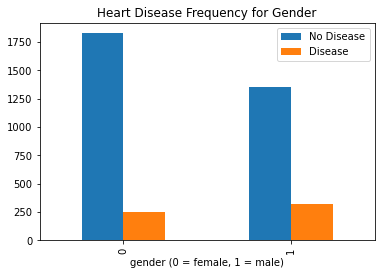

In [10]:
pd.crosstab(df.male, df.TenYearCHD).plot(kind='bar', figsize=(6,4))
plt.title('Heart Disease Frequency for Gender')
plt.xlabel('gender (0 = female, 1 = male)')
plt.legend(['No Disease', 'Disease'])

Text(0.5, 1.0, 'age and gender')

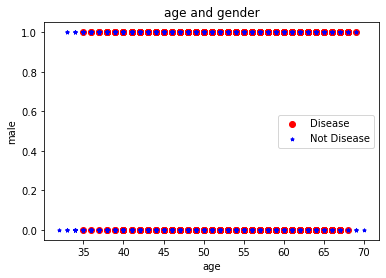

In [11]:
plt.scatter(x = df.age[df.TenYearCHD == 1], 
            y = df.male[df.TenYearCHD == 1], c = 'red')
plt.scatter(x = df.age[df.TenYearCHD == 0],
           y = df.male[df.TenYearCHD == 0], c = 'blue', marker = '*',s = 12)
plt.legend(['Disease', 'Not Disease'])
plt.xlabel('age')
plt.ylabel('male')
plt.title('age and gender')

Text(0.5, 1.0, 'systole and diastole bp correlation')

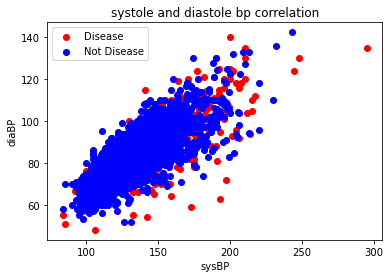

In [12]:
plt.scatter(x = df.sysBP[df.TenYearCHD == 1],
           y = df.diaBP[df.TenYearCHD == 1], c = 'red'),
plt.scatter(x = df.sysBP[df.TenYearCHD == 0], 
           y = df.diaBP[df.TenYearCHD == 0], c = 'blue')
plt.legend(['Disease', 'Not Disease'])
plt.xlabel('sysBP')
plt.ylabel('diaBP')
plt.title('systole and diastole bp correlation')

Text(0.5, 1.0, 'chol and BMI')

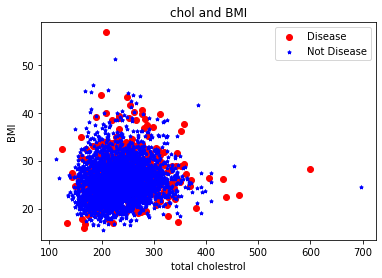

In [13]:
plt.scatter(x = df.totChol[df.TenYearCHD == 1],
           y = df.BMI[df.TenYearCHD == 1], color = 'red')
plt.scatter(x = df.totChol[df.TenYearCHD == 0],
           y = df.BMI[df.TenYearCHD == 0], color = 'blue', marker = '*', s = 12)
plt.legend(['Disease', 'Not Disease'])
plt.xlabel('total cholestrol')
plt.ylabel('BMI')
plt.title('chol and BMI')

Text(0.5, 1.0, 'Heart Rate and Hypertension')

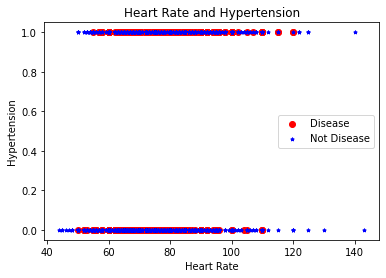

In [14]:
plt.scatter(x = df.heartRate[df.TenYearCHD == 1],
           y = df.prevalentHyp[df.TenYearCHD == 1], color = 'red')
plt.scatter(x = df.heartRate[df.TenYearCHD == 0],
           y = df.prevalentHyp[df.TenYearCHD == 0], color = 'blue', marker = '*', s = 12)
plt.legend(['Disease', 'Not Disease'])
plt.xlabel('Heart Rate')
plt.ylabel('Hypertension')
plt.title('Heart Rate and Hypertension')

Text(0.5, 1.0, 'cigs per day and gender')

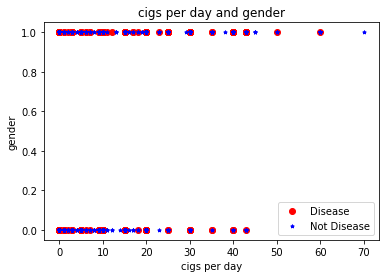

In [15]:
plt.scatter(x=df.cigsPerDay[df.TenYearCHD == 1], 
           y=df.male[df.TenYearCHD==1], color='red')
plt.scatter(x=df.cigsPerDay[df.TenYearCHD==0],
           y=df.male[df.TenYearCHD==0], color='blue', marker='*', s=12)
plt.legend(['Disease', 'Not Disease'])
plt.xlabel('cigs per day')
plt.ylabel('gender')
plt.title('cigs per day and gender')

In [16]:
from sklearn.ensemble import ExtraTreesRegressor

In [17]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

<AxesSubplot:>

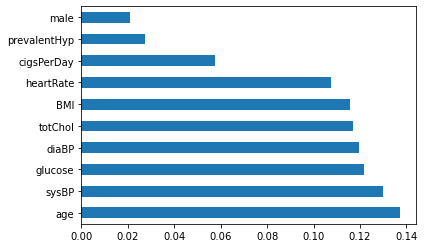

In [18]:
model = ExtraTreesRegressor()
feat_imp = model.fit(x, y)
feat_imp.feature_importances_
imp = pd.Series(feat_imp.feature_importances_, index = x.columns)
imp.nlargest(10).plot(kind='barh')